In [1]:
# import package 
#-*- coding:utf-8 -*-
import jieba
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from glob import glob
import os
import pandas as pd
import chardet

In [2]:
# 把檔案名稱中以20開頭.txt結尾的檔案存進file_list裡
file_list = glob('*.txt')
type(file_list)
file_list

[' Patents侵權2.txt',
 'apple控告侵權1.txt',
 'apple控告侵權10.txt',
 'apple控告侵權2.txt',
 'apple控告侵權3.txt',
 'apple控告侵權4.txt',
 'apple控告侵權5.txt',
 'apple控告侵權6.txt',
 'apple控告侵權7.txt',
 'apple控告侵權8.txt',
 'apple控告侵權9.txt',
 'google收購1.txt',
 'google收購10.txt',
 'google收購11.txt',
 'google收購12.txt',
 'google收購13.txt',
 'Google收購2.txt',
 'google收購3.txt',
 'google收購4.txt',
 'google收購5.txt',
 'google收購6.txt',
 'Google收購7.txt',
 'Google收購8.txt',
 'google收購9.txt',
 'htc vr1.txt',
 'htc侵權4.txt',
 'htc侵權6.txt',
 'htc侵權7.txt',
 'htc前進中國市場1.txt',
 'htc前進中國市場2.txt',
 'htc前進中國市場3.txt',
 'htc前進中國市場4.txt',
 'htc前進中國市場5.txt',
 'htc前進中國市場6.txt',
 'htc前進中國市場7.txt',
 'htc前進中國市場8.txt',
 'htc前進中國市場9.txt',
 'htc前進大陸市場10.txt',
 'htc品牌決策1.txt',
 'htc品牌決策10.txt',
 'htc品牌決策2.txt',
 'htc品牌決策3.txt',
 'htc品牌決策4.txt',
 'htc品牌決策5.txt',
 'htc品牌決策6.txt',
 'htc品牌決策7.txt',
 'htc品牌決策8.txt',
 'htc品牌決策9.txt',
 'Nokia控告侵權1.txt',
 'Nokia控告侵權10.txt',
 'Nokia控告侵權2.txt',
 'Nokia控告侵權3.txt',
 'Nokia控告侵權4.txt',
 'Nokia控告侵權5.txt',
 'Nokia控告侵權6.

In [3]:
# t 為儲存每一篇文章的list， ttolines為儲存文章中每一句話的list
t = []
i=0
for file in file_list:
    with open(file,'rb') as f :
        text=f.read()
        encode=chardet.detect(text)
    print(i)
    print(encode["encoding"])
    i=i+1
#     try:
    with open(file ,'r', encoding = encode["encoding"]) as f:
        ttolines = []
        for line in f:
            ttolines.append(line)
    t.append(ttolines)


0
UTF-8-SIG
1
UTF-16
2
UTF-16
3
UTF-16
4
UTF-16
5
UTF-16
6
UTF-16
7
UTF-16
8
UTF-16
9
UTF-16
10
UTF-16
11
UTF-8-SIG
12
UTF-8-SIG
13
UTF-8-SIG
14
UTF-8-SIG
15
UTF-8-SIG
16
UTF-8-SIG
17
UTF-8-SIG
18
UTF-8-SIG
19
UTF-8-SIG
20
UTF-8-SIG
21
UTF-8-SIG
22
UTF-8-SIG
23
UTF-8-SIG
24
UTF-8-SIG
25
UTF-8-SIG
26
UTF-8-SIG
27
UTF-8-SIG
28
UTF-16
29
UTF-16
30
UTF-16
31
UTF-16
32
UTF-16
33
UTF-16
34
UTF-16
35
UTF-16
36
UTF-16
37
UTF-16
38
UTF-16
39
UTF-16
40
UTF-16
41
UTF-16
42
UTF-16
43
UTF-16
44
UTF-16
45
UTF-16
46
UTF-16
47
UTF-16
48
UTF-16
49
UTF-16
50
UTF-16
51
UTF-16
52
UTF-16
53
UTF-16
54
UTF-16
55
UTF-16
56
UTF-16
57
UTF-16
58
UTF-8-SIG
59
UTF-8-SIG
60
UTF-8-SIG
61
UTF-8-SIG
62
UTF-8-SIG
63
UTF-8-SIG
64
UTF-8-SIG
65
UTF-8-SIG
66
UTF-8-SIG
67
UTF-8-SIG
68
UTF-8-SIG
69
UTF-8-SIG
70
UTF-8-SIG
71
UTF-8-SIG
72
UTF-8-SIG
73
UTF-8-SIG
74
UTF-8-SIG
75
UTF-8-SIG
76
UTF-8-SIG
77
UTF-8-SIG
78
UTF-8-SIG
79
UTF-8-SIG
80
UTF-16
81
UTF-16
82
UTF-16
83
UTF-16
84
UTF-16
85
UTF-16
86
UTF-16
87
UTF-16
88
UTF-16


In [4]:
#定義切文章成詞組的函數，input為儲存有文章中每一句話的list和用來儲存詞組的dict，並輸出該dict
def text_cut(d, dic_vector):
    for article in d:
        seg_list = jieba.cut(article) 
        string_list = "|".join(seg_list).split('|')
        for s in string_list:
            if not (s in dic_vector.keys()):
                dic_vector[s] = 1
            else:
                dic_vector[s] += 1
    return dic_vector

In [5]:
div_vector = {}
div_vector = text_cut(t[0],div_vector)
df = pd.DataFrame(div_vector,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t)):
    div_vector = {}
    div_vector = text_cut(t[i],div_vector)
    temp_df = pd.DataFrame(div_vector,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df = pd.concat([df,temp_df],ignore_index=True)
#把缺失值用0替代
df = df.fillna(0)
df


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/kf/sl8ws9750n5crtccdjqhqkj80000gn/T/jieba.cache
Loading model cost 1.014 seconds.
Prefix dict has been built succesfully.
/Users/apple/anaconda3/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


\t   \n           "    #    &    '     (     )    + ...     ；     ？    Ａ  \
0   0.0    5   24.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
1   0.0   25  589.0  0.0  4.0  0.0  0.0   0.0   0.0  0.0 ...   5.0   6.0  0.0   
2   0.0   25  363.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   5.0  0.0   
3   0.0   34   52.0  6.0  0.0  1.0  0.0   5.0   5.0  0.0 ...   2.0   6.0  0.0   
4   0.0    4    1.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...   0.0   0.0  0.0   
5   0.0   12    5.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   4.0   0.0  0.0   
6   0.0    7    7.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...   1.0   0.0  0.0   
7   0.0    4   28.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
8   0.0   22    5.0  0.0  0.0  0.0  0.0   4.0   4.0  0.0 ...   4.0   0.0  0.0   
9   0.0   17    7.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   1.0   4.0  0.0   
10  0.0   24   67.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   1.0   1.0  0.0   
11  0.0    7    2.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
12  0.0    7    5.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
13  0.0    7    5.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
14  0.0    6    1.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
15  0.0   10    7.0  0.0  0.0  0.0  0.0   5.0   5.0  0.0 ...   0.0   0.0  0.0   
16  0.0    8   10.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
17  0.0   13  100.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   1.0  0.0   
18  0.0   20  137.0  0.0  0.0  0.0  0.0   2.0   2.0  1.0 ...   0.0   8.0  0.0   
19  0.0    6    1.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   1.0  0.0   
20  0.0   15    1.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   2.0  0.0   
21  1.0   23  148.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   1.0   3.0  0.0   
22  0.0   14   70.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   2.0  0.0   
23  0.0    7   23.0  0.0  0.0  0.0  0.0   5.0   5.0  1.0 ...   0.0   0.0  0.0   
24  0.0    2   10.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   1.0   0.0  0.0   
25  0.0   38   19.0  0.0  0.0  0.0  0.0   5.0   5.0  0.0 ...   0.0   0.0  0.0   
26  0.0    8    4.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
27  0.0    7    5.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
28  0.0   17    7.0  0.0  0.0  0.0  0.0   0.0   0.0  1.0 ...   0.0   3.0  0.0   
29  0.0   11    4.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   2.0   0.0  0.0   
..  ...  ...    ...  ...  ...  ...  ...   ...   ...  ... ...   ...   ...  ...   
64  0.0   38    2.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   2.0  13.0  0.0   
65  0.0   26   22.0  0.0  0.0  0.0  0.0   2.0   2.0  0.0 ...   2.0   0.0  0.0   
66  0.0    7   25.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...   0.0   0.0  0.0   
67  0.0    8    0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
68  0.0   11    0.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...   0.0   0.0  0.0   
69  0.0   16   13.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   1.0  0.0   
70  0.0   14   59.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
71  0.0    6   19.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   1.0  0.0   
72  0.0   11   41.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   1.0   0.0  0.0   
73  0.0    4    8.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   1.0   0.0  0.0   
74  0.0   13   21.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   2.0   1.0  0.0   
75  0.0    4    3.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...   1.0   0.0  0.0   
76  0.0    6   14.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
77  0.0    7   64.0  0.0  0.0  0.0  0.0   0.0   0.0  4.0 ...   4.0   0.0  0.0   
78  0.0   11   21.0  0.0  1.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
79  0.0    5   19.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   0.0   0.0  0.0   
80  0.0    9    9.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...   2.0   2.0  0.0   
81  0.0  104  790.0  0.0  0.0  0.0  

In [6]:
# for i in range(len(df.columns.tolist())):
#     print(i)
#     print(df.columns.tolist()[i])

In [7]:
df_drop = df.drop(df.columns.tolist()[0:479],axis=1)
df_drop = df_drop.drop(df_drop.columns.tolist()[-21:],axis=1)
df_drop

AI  AMERICA  AMOLED  ANDROID  API  APPLE   AR  ASUS  AT&T  Abaxia  ...   \
0   0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
1   0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
2   0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
3   0.0      0.0     0.0      0.0  0.0    2.0  0.0   0.0   0.0     0.0  ...    
4   0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
5   0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
6   0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
7   0.0      0.0     0.0      1.0  0.0    5.0  0.0   0.0   0.0     0.0  ...    
8   0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
9   0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
10  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
11  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
12  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
13  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
14  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
15  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
16  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
17  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
18  1.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
19  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
20  0.0      0.0     0.0      0.0  0.0    0.0  1.0   0.0   0.0     0.0  ...    
21  3.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
22  1.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
23  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
24  1.0      0.0     0.0      0.0  0.0    0.0  3.0   0.0   0.0     0.0  ...    
25  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
26  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
27  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
28  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
29  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
..  ...      ...     ...      ...  ...    ...  ...   ...   ...     ...  ...    
64  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
65  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
66  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
67  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
68  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
69  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
70  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
71  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
72  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
73  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
74  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
75  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
76  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
77  0.0      0.0     0.0      0.0  2.0    0.0  0.0   0.0   0.0     0.0  ...    
78  0.0      0.0     0.0      0.0  2.0    0.0  0.0   0.0   0.0     0.0  ...    
79  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
80  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   0.0     0.0  ...    
81  0.0      0.0     0.0      0.0  0.0    0.0  0.0   0.0   1.0     0.0  ...    
82  0

In [8]:
# for i in range(len(df_drop.columns.tolist())):
#     print(i)
#     print(df_drop.columns.tolist()[i])

In [7]:
df_drop.to_csv("df.csv")

In [9]:
#對標點符號以外詞組做TF-IDF
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(df_drop.values)  
df_tfidf = pd.DataFrame(tfidf.toarray(), columns = df_drop.columns.tolist())
#把TF-IDF後的詞組中頻率過低的詞組刪除
#df_tfidf[df_tfidf>0.0001].dropna(axis=1)


/Users/apple/anaconda3/envs/python3/lib/python3.5/site-packages/wordcloud/wordcloud.py:464: RuntimeWarning: invalid value encountered in double_scalars
  font_size = int(round((rs * (freq / float(last_freq))


apple控告侵權1.txt


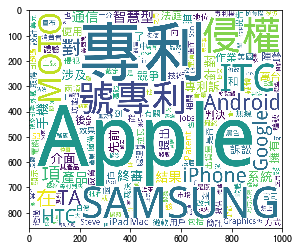

apple控告侵權10.txt


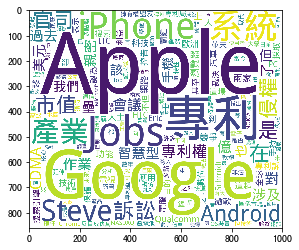

apple控告侵權2.txt


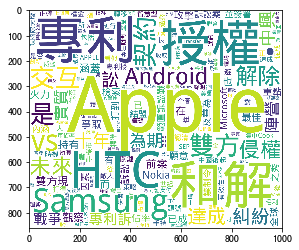

apple控告侵權4.txt


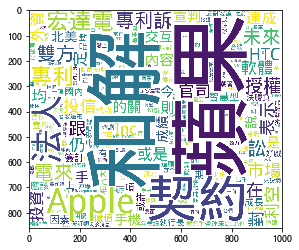

apple控告侵權7.txt


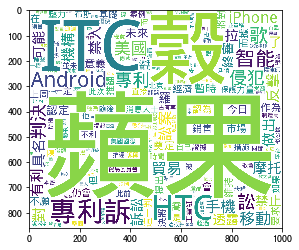

apple控告侵權8.txt


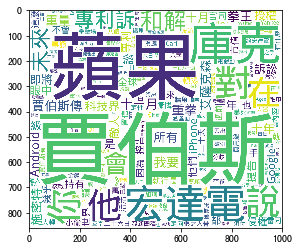

apple控告侵權9.txt


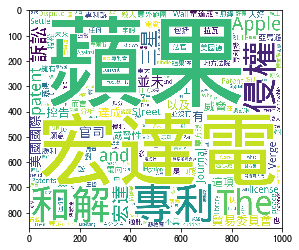

google收購1.txt


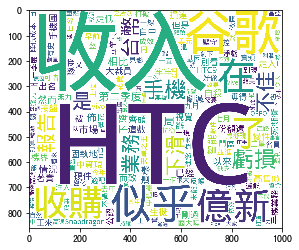

google收購10.txt


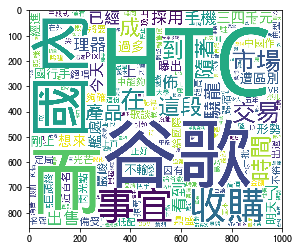

google收購11.txt


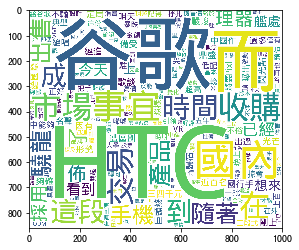

google收購13.txt


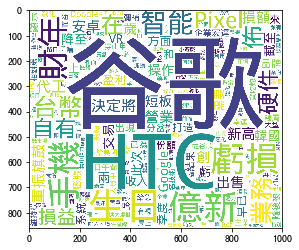

google收購3.txt


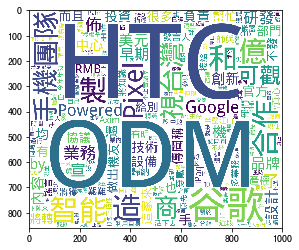

google收購4.txt


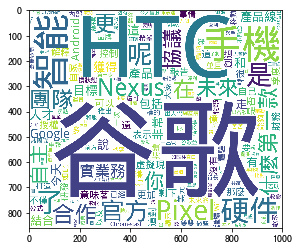

google收購6.txt


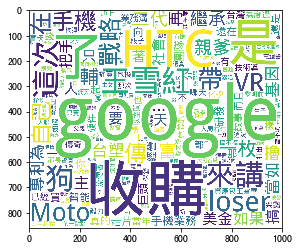

Google收購7.txt


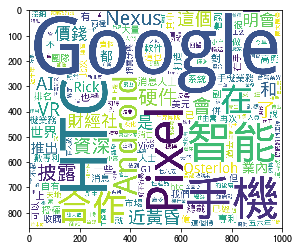

Google收購8.txt


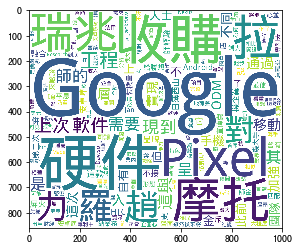

htc vr1.txt


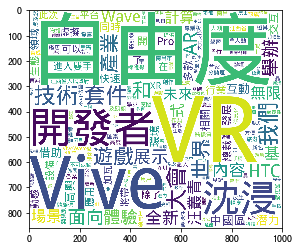

htc侵權4.txt


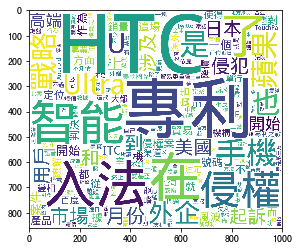

htc侵權6.txt


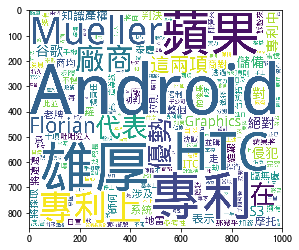

htc前進中國市場1.txt


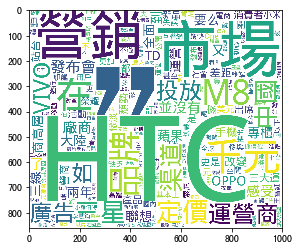

htc前進中國市場2.txt


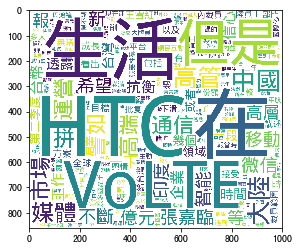

htc前進中國市場4.txt


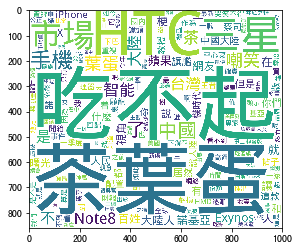

htc前進中國市場5.txt


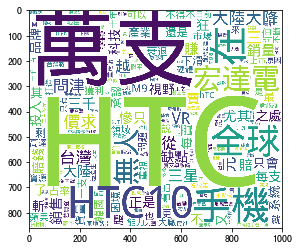

htc前進中國市場9.txt


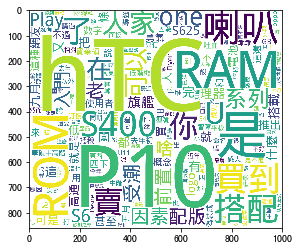

htc前進大陸市場10.txt


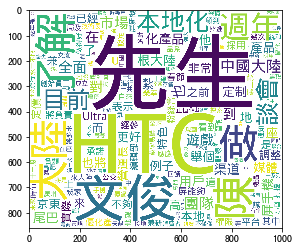

htc品牌決策1.txt


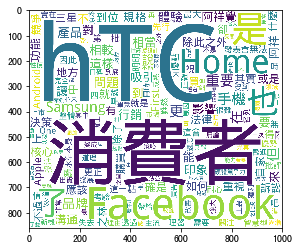

htc品牌決策10.txt


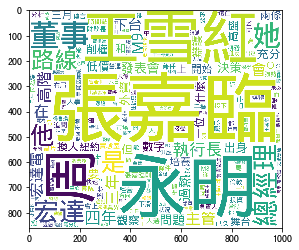

htc品牌決策2.txt


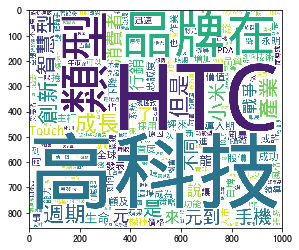

htc品牌決策4.txt


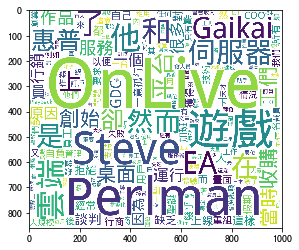

htc品牌決策5.txt


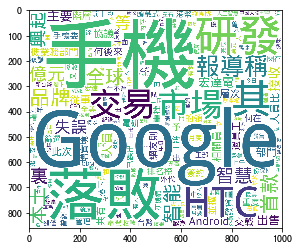

htc品牌決策6.txt


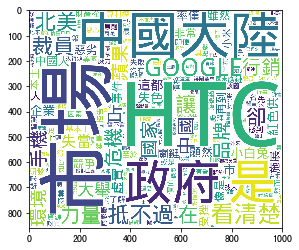

htc品牌決策7.txt


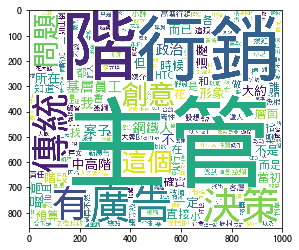

htc品牌決策8.txt


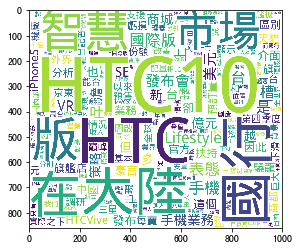

htc品牌決策9.txt


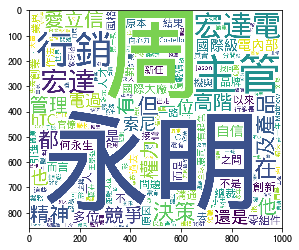

Nokia控告侵權2.txt


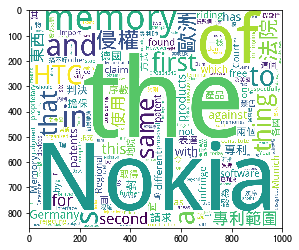

Nokia控告侵權6.txt


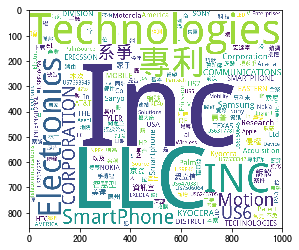

供應鏈1.txt


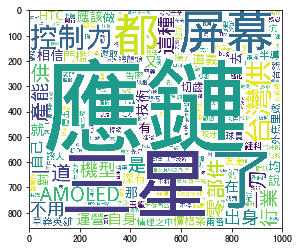

供應鏈2.txt


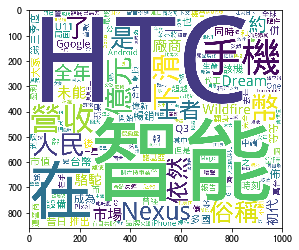

供應鏈3.txt


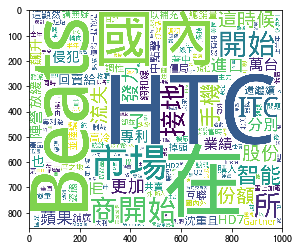

供應鏈4.txt


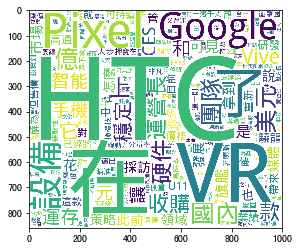

供應鏈5.txt


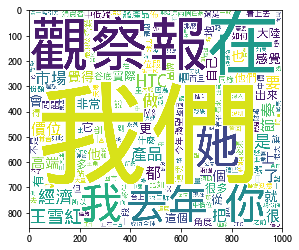

內賊2.txt


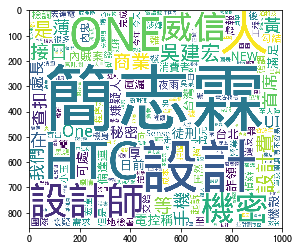

内鬼11.txt


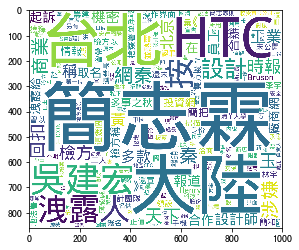

内鬼12.txt


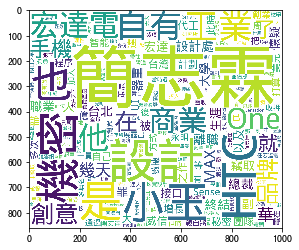

内鬼3.txt


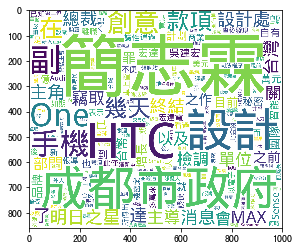

内鬼5.txt


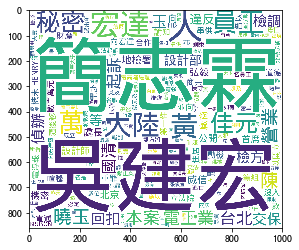

内鬼7.txt


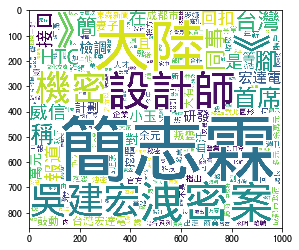

内鬼9.txt


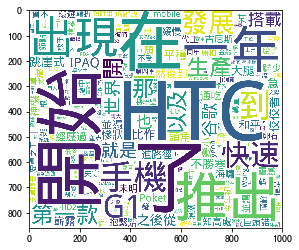

區塊鏈手機2.txt


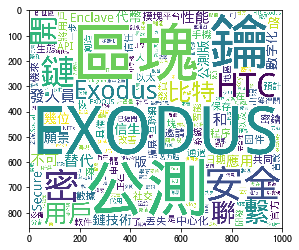

品牌時期1.txt


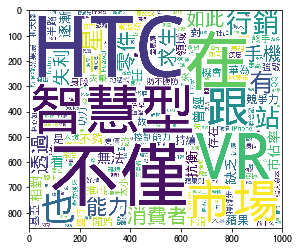

品牌時期10.txt


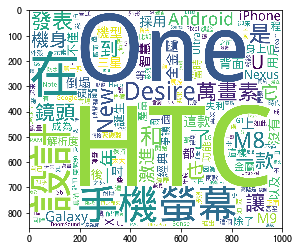

品牌時期3.txt


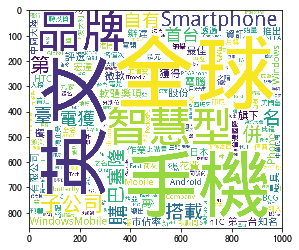

品牌時期4.txt


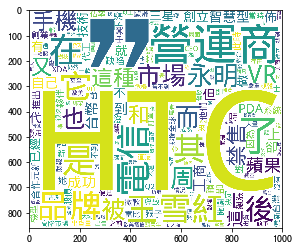

品牌時期5.txt


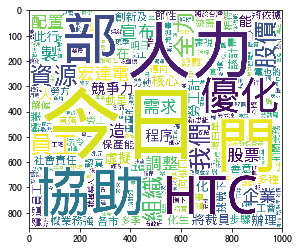

品牌時期6.txt


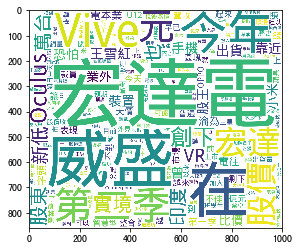

品牌時期7.txt


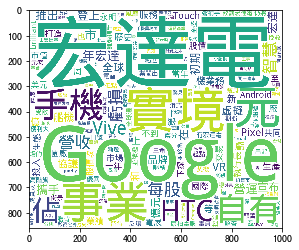

品牌時期9.txt


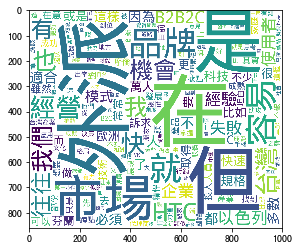

專利5.txt


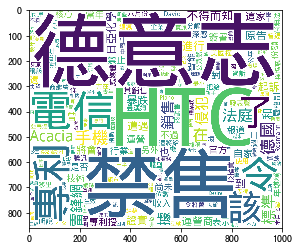

專利6.txt


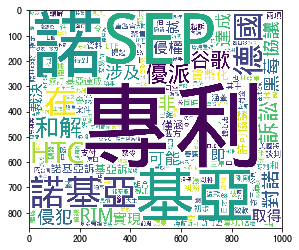

In [12]:
#結果圖呈現
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline 
tfidf_dict = df_tfidf.to_dict(orient='records')
remove_list = ['之','及','。','於','或','與','係','本','為','一','合','公司','民國','年度','月','日','註','其他','年','應','的','六','“','、','『','』','「','」']
for i in range(len(tfidf_dict)):
    #print(i)
    for item in remove_list:
        tfidf_dict[i].pop(item, None)
    wordcloud = WordCloud(font_path = 'wqy-microhei.ttc', background_color="white",width=1000, height=860, margin=2)
    try:
        wordcloud.fit_words(tfidf_dict[i])
        print(file_list[i])
        plt.imshow(wordcloud)
        plt.show()
    except: pass